In [1]:
from pynq import Overlay, allocate, PL
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

PL.reset()
overlay = Overlay('design_2.bit')

In [2]:
print('IP blocks :', list(overlay.ip_dict.keys()))

IP blocks : ['gameoflife_compute_0', 'processing_system7_0']


In [3]:
gameoflife_hard = overlay.gameoflife_compute_0

In [4]:
gameoflife_hard.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  ap_return = Register(ap_return=0),
  in_grid_1 = Register(in_grid=write-only),
  in_grid_2 = Register(in_grid=write-only),
  out_grid_1 = Register(out_grid=write-only),
  out_grid_2 = Register(out_grid=write-only),
  grid_width = Register(grid_width=write-only),
  grid_height = Register(grid_height=write-only)
}

In [5]:
width = 1024
height = 1024

buffer1 = allocate(shape=(width*height,), dtype=bool)
buffer2 = allocate(shape=(width*height,), dtype=bool)

for y in range(height):
    for x in range(width):
        n = random.random()
        if n > 0.2:
            buffer1[y*width + x] = 1
        else:
            buffer1[y*width + x] = 0

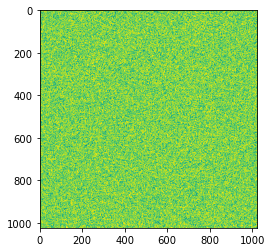

In [6]:
to_plot = buffer1.reshape((width, height))#.astype(float)
imgplot = plt.imshow(to_plot)
plt.show()

In [7]:
gameoflife_hard.register_map.in_grid_1 = buffer1.physical_address
gameoflife_hard.register_map.out_grid_1 = buffer2.physical_address

gameoflife_hard.register_map.grid_width = width
gameoflife_hard.register_map.grid_height = height

In [8]:
%matplotlib inline

start = time.time()
for i in range(100):
    gameoflife_hard.register_map.CTRL.AP_START=1
    #while gameoflife_hard.register_map.CTRL.AP_DONE == 0:
    #     ;
    while gameoflife_hard.register_map.CTRL.AP_IDLE != 1:
         ;
        
    temp = buffer1
    buffer1 = buffer2
    buffer2 = temp
    
    gameoflife_hard.register_map.in_grid_1 = buffer1.physical_address
    gameoflife_hard.register_map.out_grid_1 = buffer2.physical_address

    #to_plot = buffer2.reshape((width, height)) # astype(float)
    #imgplot = plt.imshow(to_plot)
    #plt.show()
    
end = time.time()
print(end - start)

40.73078155517578


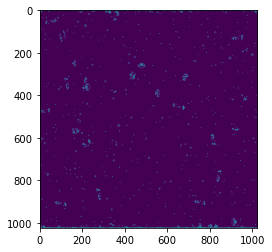

In [9]:
%matplotlib inline

to_plot = buffer2.reshape((width, height)) #astype(float)
imgplot = plt.imshow(to_plot)
plt.show()

In [ ]:
%matplotlib inline

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

for i in range(100):

    start_time = time.time()
    #start ip core
    gameoflife_hard.register_map.CTRL.AP_START=1
    #wait until is done, (or is idle)
    #while gameoflife_hard.register_map.CTRL.AP_DONE == 0:
    #     ;
    while gameoflife_hard.register_map.CTRL.AP_IDLE != 1:
         ;
    #swap buffers
    temp = buffer1
    buffer1 = buffer2
    buffer2 = temp
    
    gameoflife_hard.register_map.in_grid_1 = buffer1.physical_address
    gameoflife_hard.register_map.out_grid_1 = buffer2.physical_address
    processing_time = time.time() - start_time
        
    clear_output(wait=True)
    plt.imshow(output)
    plt.title(f"Iteration {i+1} time {processing_time}")
    plt.show()